In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [175]:
df=pd.read_csv('./Salary_Data.csv')

In [176]:
X=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,1:])

In [177]:
# X,y=make_regression(n_features=1,n_targets=1,noise=20,random_state=13)

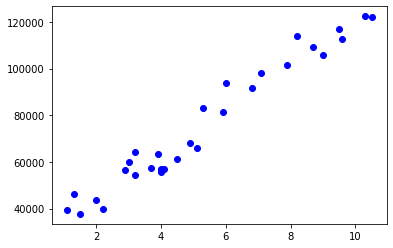

In [178]:
plt.scatter(X,y,color='b')

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [180]:
lr=LinearRegression()

In [181]:
lr.fit(X_train,y_train)

LinearRegression()

In [182]:
y_pred=lr.predict(X_test)

In [183]:
print(r2_score(y_test,y_pred))

0.8928775350863083


In [184]:
lr.coef_[0]

array([9371.31311726])

In [185]:
lr.intercept_

array([26098.01840261])

In [191]:
class gd:
    def __init__(self,lr) -> None:
        self.m=100
        self.b=-120
        self.lr=lr
    def fit(self,X,y,epoch):
        for i in range(epoch):
            slope_m=-2*np.sum((y.ravel() - self.m * X.ravel() - self.b) * X.ravel() ) 
            slope_b=-2*np.sum(y.ravel() - self.m * X.ravel() -self.b)
            self.m=self.m - (self.lr * slope_m)
            self.b=self.b - (self.lr * slope_b)
        print(self.b)
        print(self.m)
    def predict(self,X_test):
       return self.m * X_test + self.b

In [192]:
gd=gd(0.001)

In [193]:
gd.fit(X_train,y_train,1000)

26097.887738720394
9371.333162738663


In [194]:
gd_y_pred=gd.predict(X_test)

In [195]:
print(r2_score(y_test,gd_y_pred))

0.8928779547085163
